In [2]:
lfs.chdir("/mnt/net/googlenet")

true	


In [3]:
dofile 'ETL-Kanji-set.lua'
dofile 'TrainHelpers.lua'

trainSet, valSet = ETLKanjiSet.load_8g(paths.concat(dp.DATA_DIR, 'ETL-kanji-datasets'))

batch = trainSet:sample(128)
i = batch:inputs():input()
--itorch.image(i, {nrow=16,padding=2})
print(#i)
preprocess = TrainHelpers.normalizePreprocessDataset(trainSet, 255)



 128
   3
  64
  64
[torch.LongStorage of size 4]



Loaded mean and std from cache.	


Stats of 100 randomly sampled images after normalizing. Mean: -0.061132220401923 Std: 34.049925737666	


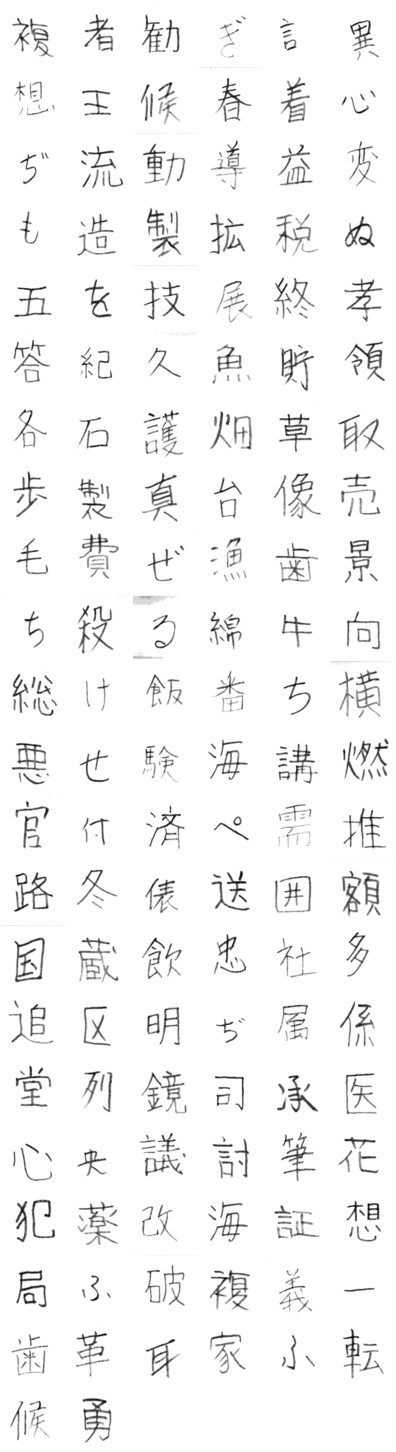

In [4]:
i = valSet:sample(128):inputs():input()
itorch.image(i)

In [5]:
dofile 'KanjiNet-allconv.lua'

Loaded mean and std from cache.	


Stats of 100 randomly sampled images after normalizing. Mean: -0.23601012020023 Std: 33.526135046742	


Starting worker thread with id: 3 seed: 1435349092


Starting worker thread with id: 2 seed: 1435349091


Starting worker thread with id: 1 seed: 1435349090


Starting worker thread with id: 4 seed: 1435349093


Starting worker thread with id: 1 seed: 1435349091


Starting worker thread with id: 2 seed: 1435349092


Starting worker thread with id: 4 seed: 1435349094


Starting worker thread with id: 3 seed: 1435349093


In [6]:
st = torch.load("snapshots-kanjinet/KanjiNet-allconv-20150626-epoch3.t7")

In [7]:
_ = weights:copy(st.modelWeights)

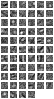

In [22]:
itorch.image(model.modules[2].weight)

# Visualizing the loss of our models

In [2]:
require 'cunn'
require 'cutorch'
require 'cudnn'
_ = require 'moses'

In [12]:
function loadState(snapshot_filename)
    local state = torch.load("../snapshots-kanjinet/"..snapshot_filename)
    return state
end
function lossHistory(state)
    
    return state.sgdState.lossLog
end
function accuracyHistory(state, name)
    local values = {}
    for _,v in ipairs(state.sgdState.accuracyLog) do
        table.insert(values, v.results[name])
    end
    return values
end

function addLossPlot(plot, name, color)
    local loss = _.slice(lossHistory(loadState(name)),
        1, 30000)
    plot:line(torch.range(1,#loss), loss, color, name)
    return plot
end

function addAccuracyPlot(plot, name, color)
    local loss = accuracyHistory(loadState(name), 'correct1')
    plot:line(torch.range(1,#loss), loss, color, name)
    return plot
end


In [ ]:
-- On the smaller 8G dataset!
plot = itorch:Plot():title("Loss Log, ETL-8G"):xaxis("Batch #"):yaxis("Training Loss")
addLossPlot(plot, "KanjiNet-allconv-20150626-epoch4.t7", "#800000")
addLossPlot(plot, "KanjiNet-allconv-small-20150626-epoch10.t7", "#080")
addLossPlot(plot, "KanjiNet-allconv-small-nodropout-20150626-epoch3.t7", "#008")
addLossPlot(plot, "KanjiNet-allconv-small-nodropout-nobatchnorm-20150626-epoch4.t7", "#880")
plot:legend(true)
plot:draw()

In [13]:
-- On the larger 9G dataset!
plot = itorch:Plot():title("Loss Log")
addLossPlot(plot, "KanjiNet-allconv-small-nodropout-20150626-latest-1332314481.t7", "#800")
plot:legend(true)
plot:draw()